In [183]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [184]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [185]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [186]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [187]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/nh/8v2vnxrx4zjf2bjtfqnchp600000gn/T/ipykernel_60026/3232911380.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [188]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [189]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [190]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [191]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(recent_date)

2017-08-23


In [192]:
import datetime
import time
from datetime import timedelta

2017-08-23 00:00:00
2016-08-23 00:00:00


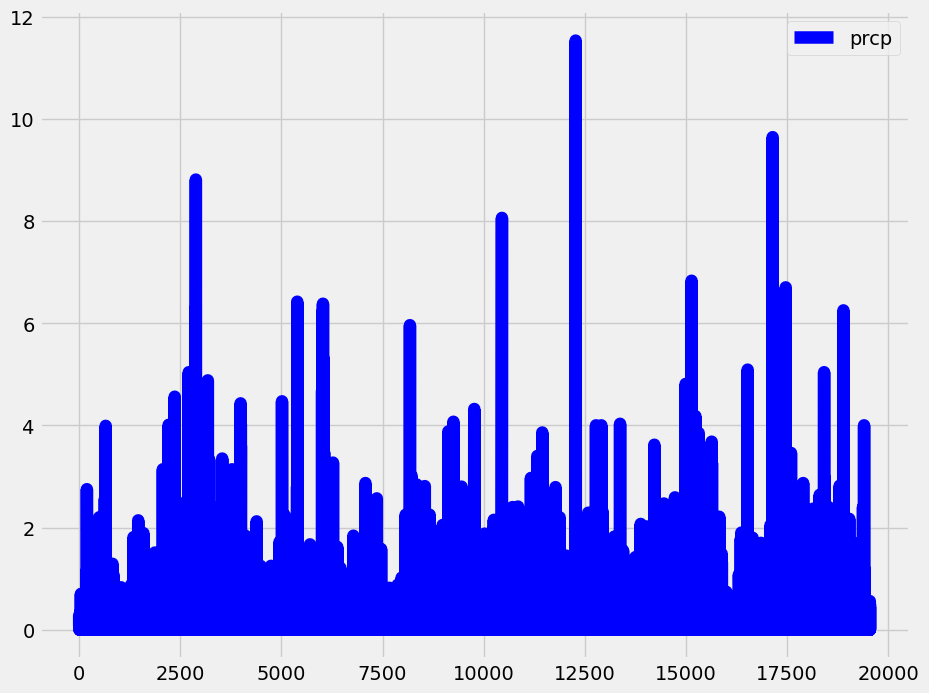

In [193]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
from datetime import datetime, timedelta
# Calculate the date one year from the last date in data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

datetime_value = dt.datetime.strptime(recent_date,'%Y-%m-%d')
print(datetime_value)

twelve_months_ago = datetime_value - timedelta(days=365)
print(twelve_months_ago)


# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).first()[0]


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(['date', 'precipitation'])

# Sort the dataframe by date

df_results.sort_values(by = ['date'], ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
##df_results = df_results.dropna()
##df.plot(x='date', y='precipitation', rot = 90)
ax=df_results.plot(color='b', figsize=(10,8) , legend = True, linewidth = 9.0,grid = True)

In [194]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_results.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [195]:
from sqlalchemy import create_engine, inspect

In [212]:
inspector = inspect(engine)
columns = inspector.get_columns("station")
for c in columns:
    print(c['name'])

id
station
name
latitude
longitude
elevation


In [226]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [222]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [230]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_measurement= session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == active_stations[0][0]).all()
temperature_measurement

[(54.0, 85.0, 71.66378066378067)]

In [233]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_results = session.query(Measurement.tobs).filter(Measurement.station == active_stations[0][0]).\
                filter(Measurement.date >= twelve_months_ago).all()
print(hist_results)

[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

<Axes: title={'center': 'Histogram of Temperature'}, ylabel='Frequency'>

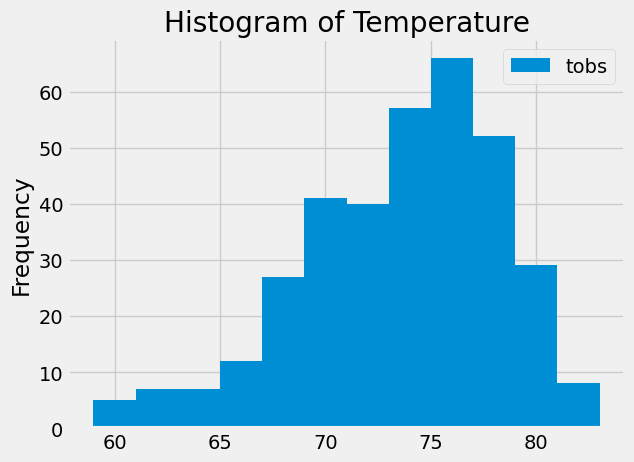

In [234]:
df = pd.DataFrame(hist_results, columns = ['tobs'])
df.plot.hist(bins = 12, title = "Histogram of Temperature")

# Close Session

In [16]:
# Close Session
session.close()